In [1]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.patches as patches
import seaborn as sns


% matplotlib inline

In [2]:
nc_filename=sorted(glob.glob\
    ('/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/result/ENG319582008.nc'))#*_ptrc_T*.nc'))

print("found *.nc file: \n{}".format(nc_filename))
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:,:]
lat=ptrc.variables['nav_lat'][:,:]
dep = ptrc.variables['deptht'][:]


tmask=nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
mbathy=tmask.variables['mbathy'][0,400:,:]
tmask=tmask.variables['tmask'][0,:,400:,:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/result/ENG319582008.nc']


In [3]:
nclist=['/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/result/ENG319582008.nc',
       '/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/ENG319582002.nc']

In [4]:
# snapshot

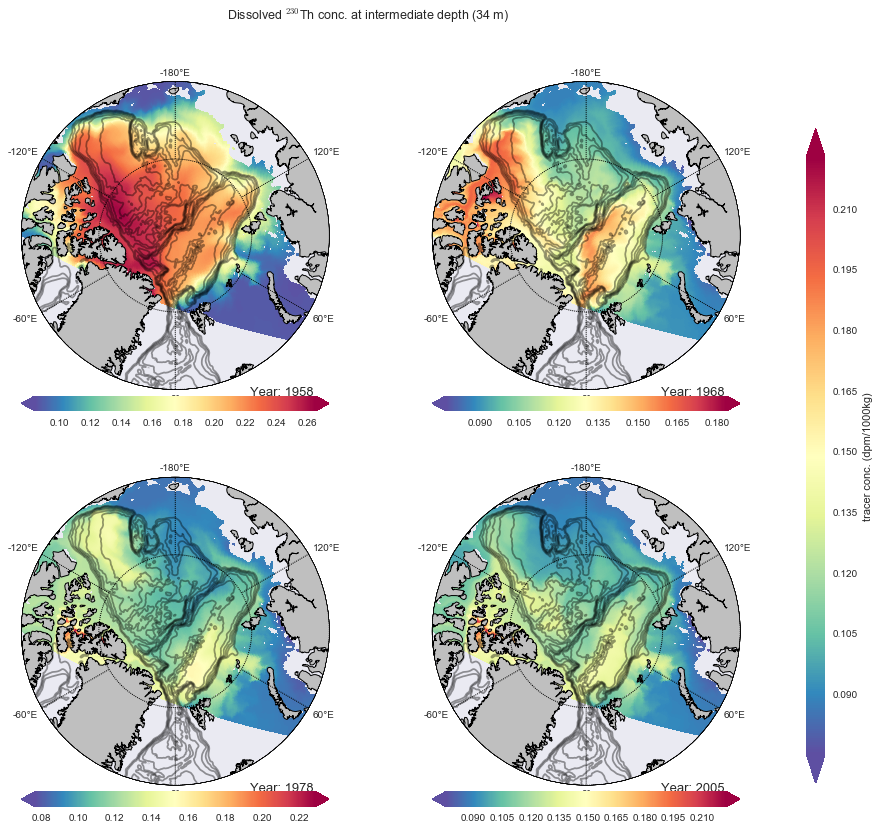

In [30]:
layer= 15
ptrc=nc.Dataset(nclist[0])
string='TR_7'
title ='Dissolved $^{230}$Th'


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time in zip(axes.flat,[1958-1958,1968-1958,1978-1958,2005-1958]):
    data =ptrc.variables[string][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r'); 
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    cbar=m.colorbar(cs,location='bottom',extend='both')
    #cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar=fig.colorbar(cs,cax=cax,extend='both')
cbar.set_label('tracer conc. (dpm/1000kg)')


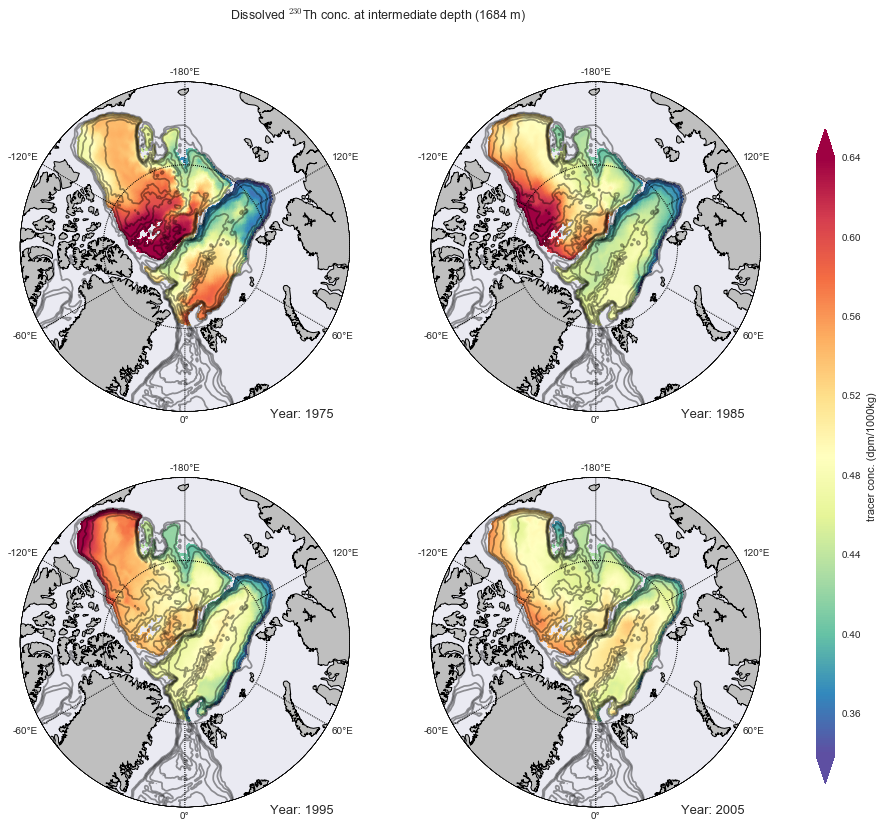

In [8]:
layer= 38
ptrc=nc.Dataset(nclist[0])
string='TR_8'
title ='Dissolved $^{230}$Th'


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time in zip(axes.flat,[1975-1958,1985-1958,1995-1958,2005-1958]):
    data =ptrc.variables[string][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.34,vmax=0.64); 
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    #cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar=fig.colorbar(cs,cax=cax,extend='both')
cbar.set_label('tracer conc. (dpm/1000kg)')


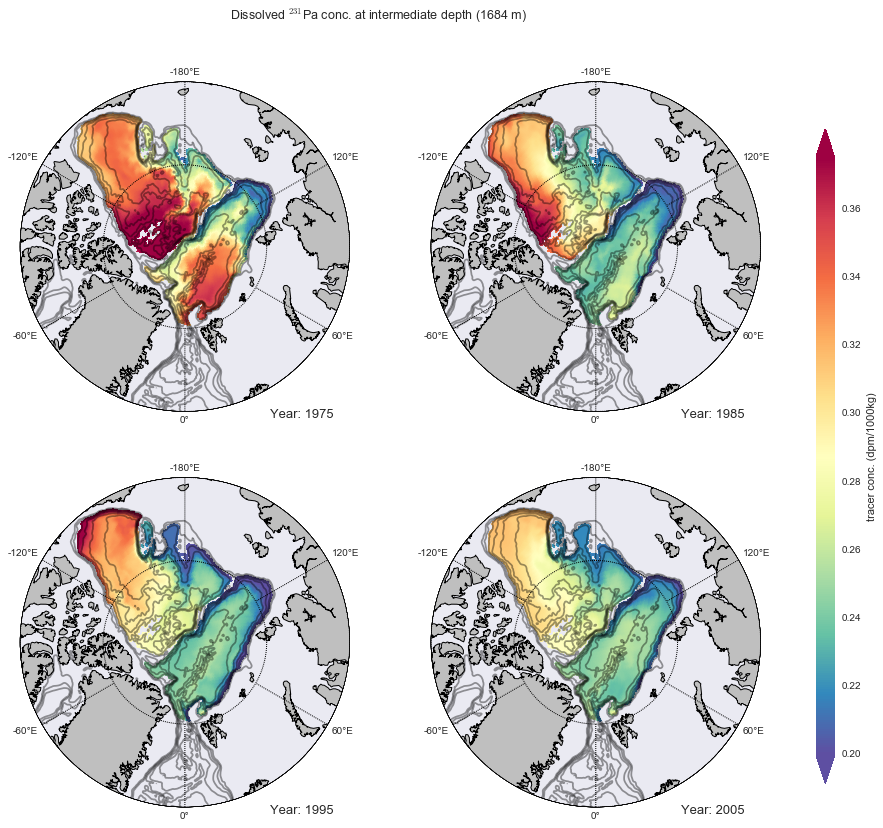

In [9]:
layer= 38
ptrc=nc.Dataset(nclist[0])
string='TR_7'
title ='Dissolved $^{231}$Pa'


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time in zip(axes.flat,[1975-1958,1985-1958,1995-1958,2005-1958]):
    data =ptrc.variables[string][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.2,vmax=0.375); 
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    #cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar=fig.colorbar(cs,cax=cax,extend='both')
cbar.set_label('tracer conc. (dpm/1000kg)')


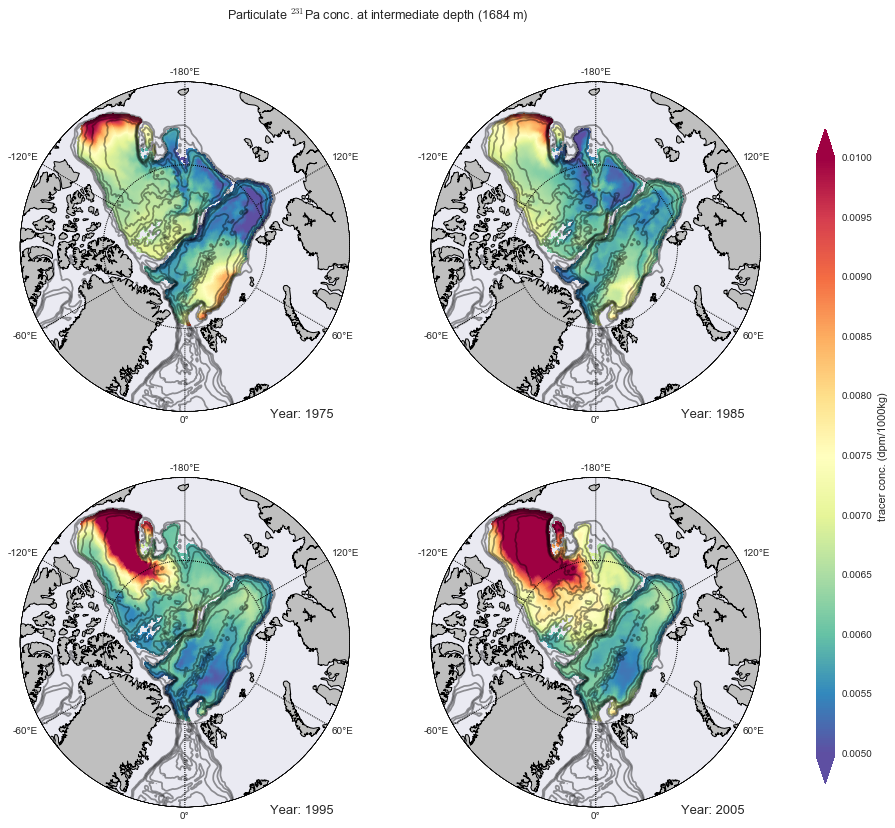

In [12]:
layer= 38
ptrc=nc.Dataset(nclist[0])
string='TR_9'
title ='Particulate $^{231}$Pa'


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time in zip(axes.flat,[1975-1958,1985-1958,1995-1958,2005-1958]):
    data =ptrc.variables[string][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.005,vmax=0.01); 
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    #cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar=fig.colorbar(cs,cax=cax,extend='both')
cbar.set_label('tracer conc. (dpm/1000kg)')


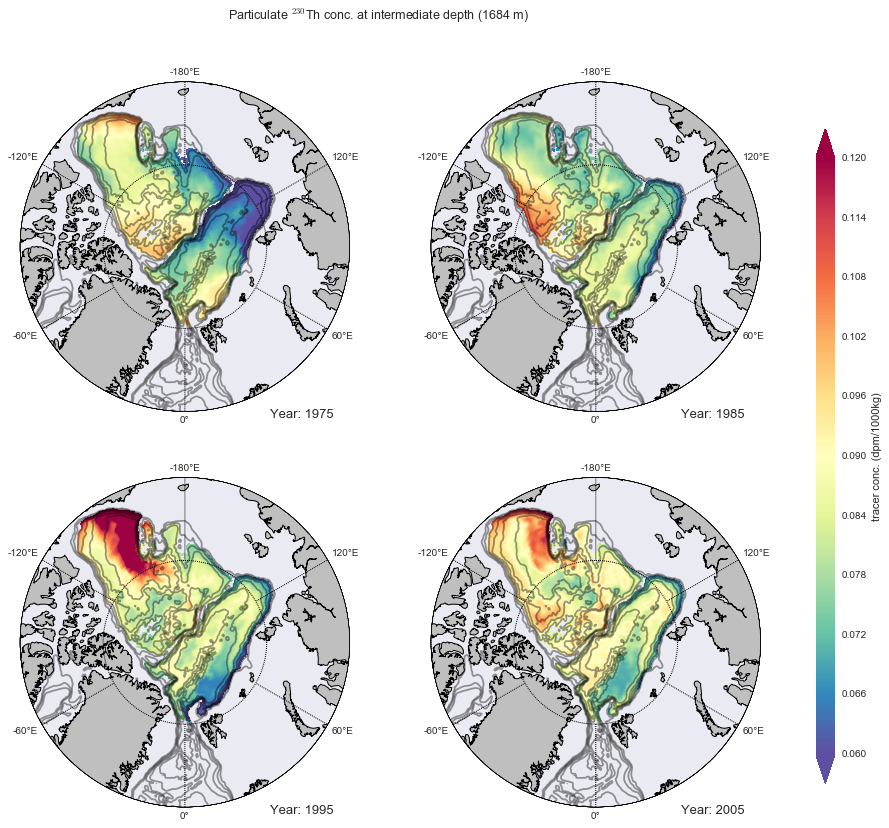

In [13]:
layer= 38
ptrc=nc.Dataset(nclist[0])
string='TR_10'
title ='Particulate $^{230}$Th'


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time in zip(axes.flat,[1975-1958,1985-1958,1995-1958,2005-1958]):
    data =ptrc.variables[string][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.06,vmax=0.12); 
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    #cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar=fig.colorbar(cs,cax=cax,extend='both')
cbar.set_label('tracer conc. (dpm/1000kg)')

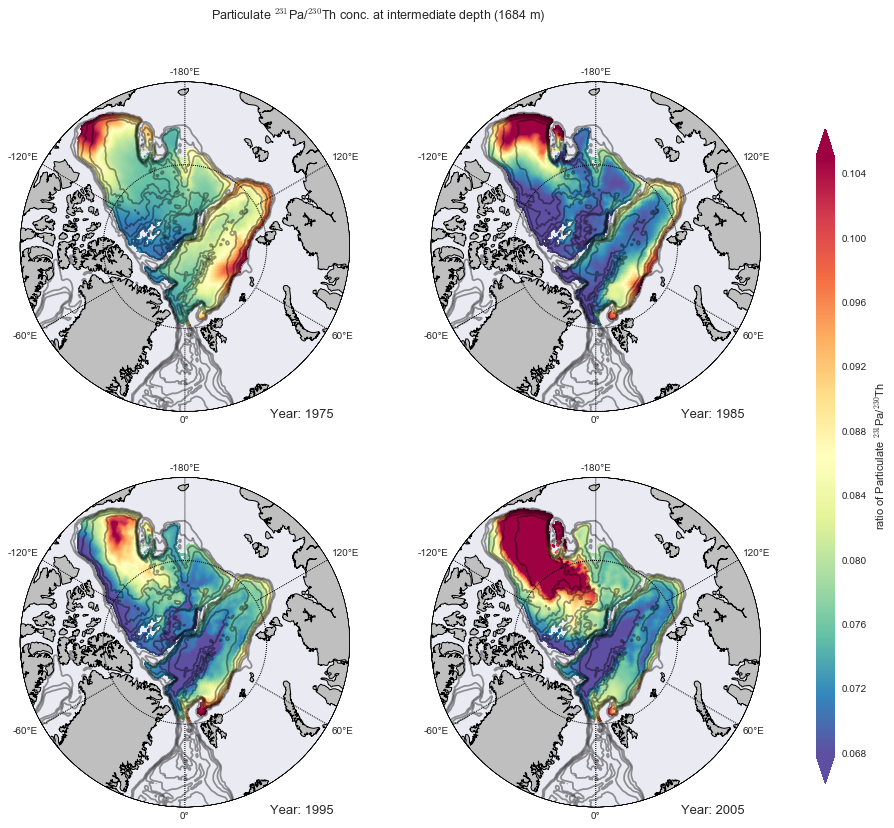

In [18]:
layer= 38
ptrc=nc.Dataset(nclist[0])
string='TR_9'
string2='TR_10'
title ='Particulate $^{231}$Pa/$^{230}$Th'
vmin=[0.07,0.063,0.065,0.065]
vmax=[0.100,0.110,0.100,0.136]


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time,vmin,vmax in zip(axes.flat,[1975-1958,1985-1958,1995-1958,2005-1958],vmin,vmax):
    data =ptrc.variables[string][time,:,:,:]/ptrc.variables[string2][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.068,vmax=0.105); 
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    #cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar=fig.colorbar(cs,cax=cax,extend='both')
cbar.set_label('ratio of Particulate $^{231}$Pa/$^{230}$Th')


plt.show()

we can see circulation pattern in CB and EB, however, the trend in MB is not that obvious.

also, donn't see where is the way out..?

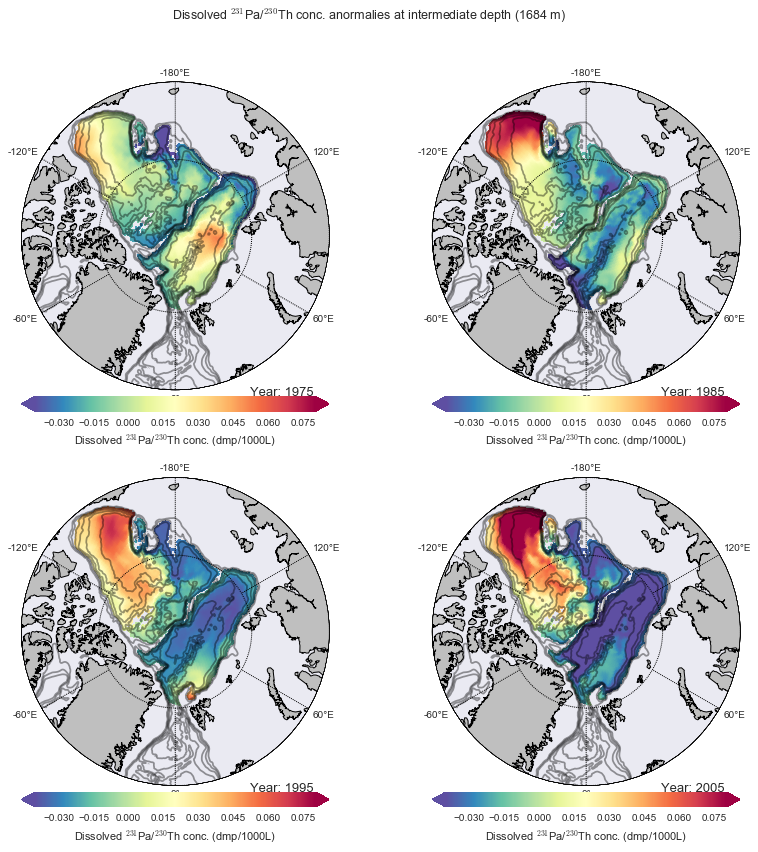

In [11]:
layer= 38
ptrc=nc.Dataset(nclist[0])
string='TR_7'
string2='TR_8'
title ='Dissolved $^{231}$Pa/$^{230}$Th'
vmin=[0.57,0.52,0.49,0.48]
vmax=[0.66,0.62,0.60,0.64]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time,vmin,vmax in zip(axes.flat,[1975-1958,1985-1958,1995-1958,2005-1958],vmin,vmax):
    data =ptrc.variables[string][time,:,:,:]/ptrc.variables[string2][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:]-np.mean(data[layer,:,:]),cmap='Spectral_r',vmin=-0.04,vmax=0.08); 
    cbar=m.colorbar(cs,location='bottom',extend='both')
    cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. anormalies at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)
plt.show()

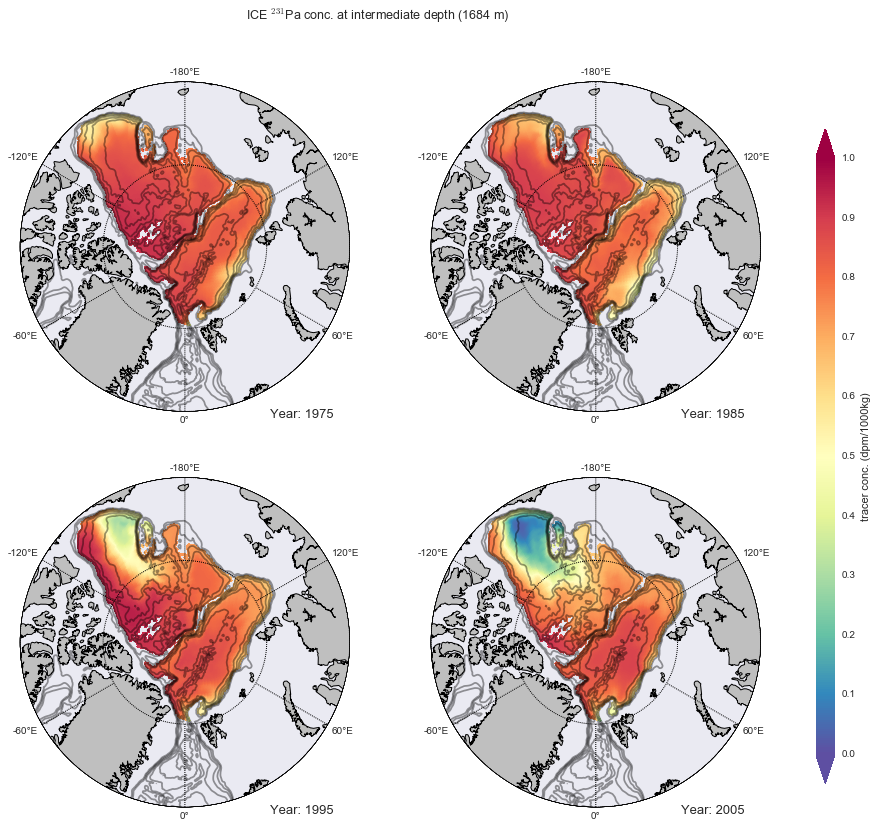

In [14]:
layer= 38
ptrc=nc.Dataset(nclist[0])
string='TR_11'
title ='ICE $^{231}$Pa'


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13.5,13))
for ax,time in zip(axes.flat,[1975-1958,1985-1958,1995-1958,2005-1958]):
    data =ptrc.variables[string][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    data[:,:125,:]=np.ma.masked

    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    # pcolor
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.0,vmax=1.); 
    ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)
    #cbar=m.colorbar(cs,location='bottom',extend='both')
    #cbar.set_label('%s conc. (dmp/1000L)'%(title))
    #cbar.formatter.set_powerlimits((-1, 1))
    #cbar.update_ticks()
    # bathy
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    
fig.suptitle('%s conc. at intermediate depth (%.0f m)'%(title,dep[layer]),fontsize=12.5)

cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar=fig.colorbar(cs,cax=cax,extend='both')
cbar.set_label('tracer conc. (dpm/1000kg)')


In [ ]:
# earlier pa/th

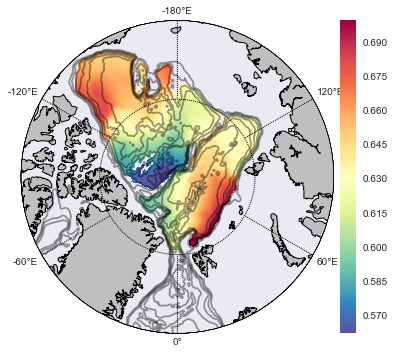

In [67]:
time=1965-1958
data =ptrc.variables[string][time,:,:,:]/ptrc.variables[string2][time,:,:,:]
data =np.ma.masked_where(tmask==0,data)
data[:,:125,:]=np.ma.masked

fig=plt.figure(figsize=(6,6))
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
# pcolor
m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmax=0.7); 
m.colorbar()
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
ax.text(0.95,-0.02, 'Year: %s'%(1958+time), transform=ax.transAxes, ha='right', fontsize=13)